In [74]:
# importing dependencies
# numpy for arrays and for structuring of datasets
import numpy as np
# os for file paths
import os 
# importing open cv
import cv2
# time to give user time to get into position before using sign language
import time
# for visualising images
from matplotlib import pyplot as plt
# for hand detection
import mediapipe as mp

Accessing webcam using open cv and using the mediapipe import to apply detections to the camera.
- OxFF creates a bit mask which sets the 24 bits on the left to zero
- waitkey(1) returns a 32-bit integer
- Since ord() returns a value between 255 and 0, a mask can be applies which checks if the corresponding key has been pressed, this is possible because of the limited character set on a keyboard
- Converting image from BGR to RGB, then set it to unwritable to save on memory. The detection is then made, and the image is converted is set back to writeable and set back to BGR from RGB. Essentially cv2 will reads the webcam feed as BGR, but mediapipe will read it as RGB. 

In [75]:
# drawing utilities set to draw detections and holostic model variable set to create detections
mp_drawingUtilities = mp.solutions.drawing_utils
mp_holosticModel = mp.solutions.holistic

In [76]:
# defining new function
def mediapipe_detection (webcamImage,holosticModel):
    # converting webcam image from BGR to RGB
    webcamImage = cv2.cvtColor(webcamImage, cv2.COLOR_BGR2RGB)
    # setting writeable to false to save on memory and then processing the image
    webcamImage.flags.writeable = False
    # making prediction from webcam image(cv2) and creating a result variable
    preditctionResults = holosticModel.process(webcamImage)
    webcamImage.flags.writeable = True
    # converting webcam image back to BGR from RGB
    webcamImage = cv2.cvtColor(webcamImage, cv2.COLOR_RGB2BGR)
    # return image and prediction results from webcam for the loop
    return webcamImage, preditctionResults

In [77]:
# define new function, grab image and results from mediapipe model
def draw_styled_landmarks(webcamImage,preditctionResults):
# drawing utilities used to draw landmarks using mediapipe to show landmarks and connections 
    # drawing right hand landmarks and hand connections
    mp_drawingUtilities.draw_landmarks(webcamImage,preditctionResults.right_hand_landmarks, mp_holosticModel.HAND_CONNECTIONS, 
                                        mp_drawingUtilities.DrawingSpec(thickness=1, circle_radius=3, color=(0,0,255)),
                                        mp_drawingUtilities.DrawingSpec(thickness=1, circle_radius=2, color=(0,0,255))
                                        )                                     
    # drawing left hand landmarks and hand connections
    mp_drawingUtilities.draw_landmarks(webcamImage,preditctionResults.left_hand_landmarks, mp_holosticModel.HAND_CONNECTIONS,
                                        mp_drawingUtilities.DrawingSpec(thickness=1, circle_radius=3, color=(0,255,0)),
                                        mp_drawingUtilities.DrawingSpec(thickness=1, circle_radius=2, color=(0,255,0))
                                        )
    # drawing face landmarks and face connections
    mp_drawingUtilities.draw_landmarks(webcamImage,preditctionResults.face_landmarks, mp_holosticModel.FACEMESH_CONTOURS,
                                        mp_drawingUtilities.DrawingSpec(thickness=1, circle_radius=1, color=(255,0,0)),
                                        mp_drawingUtilities.DrawingSpec(thickness=1, circle_radius=1, color=(255,0,0))
                                        )
    # drawing pose landmarks and pose connections
    mp_drawingUtilities.draw_landmarks(webcamImage,preditctionResults.pose_landmarks, mp_holosticModel.POSE_CONNECTIONS,
                                        mp_drawingUtilities.DrawingSpec(thickness=2, circle_radius=1, color=(102,0,102)),
                                        mp_drawingUtilities.DrawingSpec(thickness=2, circle_radius=1, color=(102,0,102))
                                        )

- value - min_detection_confidence= for the detection to be confisdered successful
- value - min_tracking_confidence= can be increased for increased robustness, but it creates more latency

In [78]:
# set webcam as a video capture, set to device value 0
webcamCapture = cv2.VideoCapture(0)
# creating initial detection confidence and tracking confidence values in the mediapipe model and then running the while loop which starts the webcam feed
with mp_holosticModel.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.7) as holistic:
    # while webcam is open, loop every frame
    #while webcamCapture.isOpened():
        # read webcam caputre
        ret, webcamFrame = webcamCapture.read()
        # unpacking results from above def function to make detections
        webcamImage, preditctionResults = mediapipe_detection(webcamFrame, holistic)
        # print(preditctionResults)
        # drawing landmarks on live webcam feed
        draw_styled_landmarks(webcamImage, preditctionResults)
        # show webcam on screen
       # cv2.imshow('Webcam feed', webcamImage)
        # if n is pressed, the loop ends
        #if cv2.waitKey(1) & 0xFF == ord('n'):
           # break
        # closes video file or capturing device
    #webcamCapture.release()
    # destory the specific window created with imshow()
   # cv2.destroyWindow('Webcam feed')

In [79]:
draw_styled_landmarks(webcamFrame, preditctionResults)

  # show last frame in webcam feed
#plt.imshow(cv2.cvtColor(webcamFrame, cv2.COLOR_BGR2RGB))

In [80]:
# extracting landmarks from the webcam frame and placing them in a np array
# allLandmarkResults = []
# for landmarkResults in preditctionResults.pose_landmarks.landmark:
#     poseLandmarkArray = np.array([landmarkResults.x, landmarkResults.y, landmarkResults.z, landmarkResults.visibility])
#     allLandmarkResults.append(poseLandmarkArray)
# refactored and flattened version of same array, so all results are in one large array

# left hand landmarks array. If left_hand_landmarks are not present, an empty array of 21*3 zeroes will be put in place instead. The reason for this number is because there are 21 connections in the 
# left and right hand, and each of those have 3 coordinates, meaning there will always be 63 elements in the array for the left and right hand respectively.
leftHandLandmarks = np.array([[landmarkResults.x, landmarkResults.y, landmarkResults.z] for landmarkResults in preditctionResults.left_hand_landmarks.landmark]).flatten() if preditctionResults.left_hand_landmarks else np.zeros(21*3)

rightHandLandmarks = np.array([[landmarkResults.x, landmarkResults.y, landmarkResults.z] for landmarkResults in preditctionResults.right_hand_landmarks.landmark]).flatten() if preditctionResults.right_hand_landmarks else np.zeros(21*3)

faceLandmarks = np.array([[landmarkResults.x, landmarkResults.y, landmarkResults.z] for landmarkResults in preditctionResults.face_landmarks.landmark]).flatten() if preditctionResults.face_landmarks else np.zeros(468*3)

poseLandmarks = np.array([[landmarkResults.x, landmarkResults.y, landmarkResults.z, landmarkResults.visibility] for landmarkResults in preditctionResults.pose_landmarks.landmark]).flatten() if preditctionResults.pose_landmarks else np.zeros(33*4)


#printing all landmark results for testing
##len(leftHandLandmarks)
##leftHandLandmarks

In [81]:
# creating function to extract all landmarks
def extract_Landmark_Keypoints(preditctionResults):
    leftHandLandmarks = np.array([[landmarkResults.x, landmarkResults.y, landmarkResults.z] for landmarkResults in preditctionResults.left_hand_landmarks.landmark]).flatten() if preditctionResults.left_hand_landmarks else np.zeros(21*3)
    rightHandLandmarks = np.array([[landmarkResults.x, landmarkResults.y, landmarkResults.z] for landmarkResults in preditctionResults.right_hand_landmarks.landmark]).flatten() if preditctionResults.right_hand_landmarks else np.zeros(21*3)
    faceLandmarks = np.array([[landmarkResults.x, landmarkResults.y, landmarkResults.z] for landmarkResults in preditctionResults.face_landmarks.landmark]).flatten() if preditctionResults.face_landmarks else np.zeros(468*3)
    poseLandmarks = np.array([[landmarkResults.x, landmarkResults.y, landmarkResults.z, landmarkResults.visibility] for landmarkResults in preditctionResults.pose_landmarks.landmark]).flatten() if preditctionResults.pose_landmarks else np.zeros(33*4)

# concatenating all keypoints
    return np.concatenate([leftHandLandmarks, rightHandLandmarks, faceLandmarks, poseLandmarks])

# dispalying amount of elements in array
extract_Landmark_Keypoints(preditctionResults).shape
# display first 20 elements from array
##extract_Landmark_Keypoints(preditctionResults)[:20]
resultTest = extract_Landmark_Keypoints(preditctionResults)



In [82]:
# setting up folders for exported data for collection
DATA_PATH = os.path.join('ASL-Phrases')

# actions that will be detected
gestureActions = np.array(['hello', 'good morning', 'welcome', 'thankyou'])
# amount of videos taken for data collection, 40 videos worth of data and videos will be 30 frames long
sequence_Number = 40
sequence_Length = 30

In [83]:
# creating folders to store data in
# for each action in gesture action array, create a folder with the name of each element in the gestureActions array, then create a subfolder up to number 39 (sequence_Number = 40)
for eachAction in gestureActions:
    # looping through 40 different videos
    for gestureSequence in range(sequence_Number):
        try:
            # if loop is successfull, create a folder for each gesture sequence, if folder exists, pass
            os.makedirs(os.path.join(DATA_PATH, eachAction, str(gestureSequence)))
        except:
            pass

In [84]:
 # collecting data
 # set webcam as a video capture, set to device value 0
# webcamCapture = cv2.VideoCapture(0)
#  # creating initial detection confidence and tracking confidence values in the mediapipe model and then running the while loop which starts the webcam feed
# with mp_holosticModel.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.7) as holistic:
#      # loop through each action
#      for eachAction in gestureActions:
#          # loop through each gesture sequence
#          for gestureSequence in range(sequence_Number):
#             # loop through each video
#             for frameNumber in range(sequence_Length):
                 # read webcam caputre
                # ret, webcamFrame = webcamCapture.read()
                #  # unpacking results from above def function to make detections
                # webcamImage, preditctionResults = mediapipe_detection(webcamFrame, holistic)
                # print(preditctionResults)
                #  # drawing landmarks on live webcam feed
                # draw_styled_landmarks(webcamImage, preditctionResults)

                #  # creating breaks in between each video capture so the hand can be moved easily for each video taken
                # if frameNumber == 0:
                #     cv2.putText(webcamImage, 'COLLECTING DATA', (120,200),
                #                  cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255), 4, cv2.LINE_AA)
                #     cv2.putText(webcamImage, 'COLLECTING FRAMES FOR {} VIDEO NUMBER {}'.format(eachAction, gestureSequence), (15,12),
                #                  cv2.FONT_HERSHEY_PLAIN, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                #     cv2.waitKey(3000)  
                    
                # else:
                #      cv2.putText(webcamImage, 'COLLECTING FRAMES FOR {} VIDEO NUMBER {}'.format(eachAction, gestureSequence), (15,12),
                #      cv2.FONT_HERSHEY_PLAIN, 0.5, (0, 0, 255), 1, cv2.LINE_AA)       
                             
        
                #  # extracting keypoints and saving them into folders
                # savedKeypoints = extract_Landmark_Keypoints(preditctionResults)
                # npy_path = os.path.join(DATA_PATH, eachAction, str(gestureSequence), str(frameNumber))
                # np.save(npy_path, savedKeypoints)

                 # show webcam on screen
#                 cv2.imshow('Webcam feed', webcamImage)
                
            
#                  # if n is pressed, the loop ends
#                 if cv2.waitKey(10) & 0xFF == ord('n'):
#                     break
#         # closes video file or capturing device
# webcamCapture.release()
#         # destory the specific window created with imshow()
# cv2.destroyWindow('Webcam feed')

In [85]:
#         # closes video file or capturing device
# webcamCapture.release()
#         # destory the specific window created with imshow()
# cv2.destroyWindow('Webcam feed')

In [86]:
# importing more dependencies to preprocess data, create labels and create features
# convert data
from tensorflow.keras.utils import to_categorical
# to create and seperate training and testing data
from sklearn.model_selection import train_test_split
# creating label map and looping through each gesture action (words)
labelMap = {label:number for number, label in enumerate(gestureActions)}

featureSequences, labels = [], []
for eachAction in gestureActions:
        # loop through each gesture sequence
        for gestureSequence in range(sequence_Number):
            window = []
            # loop through each video
            for frameNumber in range(sequence_Length):
                labelMapResult = np.load(os.path.join(DATA_PATH, eachAction, str(gestureSequence), "{}.npy".format(frameNumber)))
                # once loop has finished going through one video, append it to the labelMapresult and start again for the next video
                window.append(labelMapResult)
            # grabbing video and appending it to featureSequences array
            featureSequences.append(window)
            # appending label for each action
            labels.append(labelMap[eachAction])

##np.array(featureSequences).shape
##featureSequences

X = np.array(featureSequences)
##X.shape
# creating array which shows 0 or 1 and represents the letters of the alphabet. [1, 0, 0, 0] == a, [0, 1, 0, 0] == b and so on...
y = to_categorical(labels).astype(int)
##y
# unpacking train test split function, test size = 0.15 (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_test.shape
#X_train.shape
#y_test.shape
#y_train.shape

(40, 30, 1662)

 Building and training neural network LSTM using keras and tensorflow

In [87]:
# import sequential model, LSTM, Dense and the tensor board
# to create sequential neural network
from tensorflow.keras.models import Sequential
# importing LSTM = temporal component and allows to perform action detection, Dense = fully connected layer
from tensorflow.keras.layers import LSTM, Dense
# logginig in tensor board to trace model as its being trained
from tensorflow.keras.callbacks import TensorBoard
from keras.callbacks import TensorBoard
# tensor board = web app provided with tensorflow package, allows for logging and monitoring neutral network training and the accuracy
log_dir = os.path.join('TensorBoardLogs')
tb_callback = TensorBoard(log_dir=log_dir)

why lstm and mediapipe
- usually cnn and then lstm is used (requires alot of pretrained data for accuracy)
- lstm and mediapipe allows for less pretrained data needed and is more accurate

In [88]:
sequentialModel = Sequential()
# adding 3 sets of LSTM layers
# 3 keyword argument, 1 positional argument, 64 LSTM units, return true if u want to stack sequences, activation relu, but can be changed. 
# Input shape is 30 frames by 1662 which is essentially the X.shape elements
sequentialModel.add(LSTM(64, return_sequences=True, activation='relu' , input_shape=(30,1662)))
# 128 LSTM units, return sequence for next 64 LSTM units
sequentialModel.add(LSTM(128, return_sequences=True, activation='relu'))
# 64 LSTM units, return sequences to false because next layer is a dense layer, and the sequences are not needed for that
sequentialModel.add(LSTM(64, return_sequences=False, activation='relu'))
# using fully connected layers, 64 dense units 
sequentialModel.add(Dense(64, activation='relu'))

# 32 dense units
sequentialModel.add(Dense(32, activation='relu'))

# return output of model    , softmax returns values with a probability of 0 to 1 (array of probability that adds up to one)
sequentialModel.add(Dense(gestureActions.shape[0], activation='softmax'))

In [89]:
# compiling model
# optimizer can be changed to different values such as (SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl)
# loss cannot be changed, this is for multi-class classification model, however if the classification was binary, binary_crossentropy would be used, regression would be different too
# metrics is optional, but useful if you want to track your accuracy as you train
sequentialModel.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [90]:
# del sequentialModel

In [91]:
import keras

# # fitting model
#  #can stop training earlier if accuracy is good and loss has stopped decreasing substantially 
#  #pass through X training datam y training data, 1000 passes = epochs, 
#  #data will fit into memory, so a data generator does not need to be build for a pipeline of data
# tb_callback = keras.callbacks.EarlyStopping(monitor='val_loss', 
#                                  min_delta=0, 
#                                  patience=0, 
#                                  verbose=0, 
#                                  mode='auto', 
#                                  baseline=None, 
#                                  restore_best_weights=False)
# sequentialModel.fit(X_train, y_train, epochs=40, callbacks=[tb_callback])

In [92]:
# summary of sequential model
sequentialModel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_10 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 132       
Total params: 596,708
Trainable params: 596,708
Non-trainable params: 0
________________________________________________

In [93]:
# making model predictions
# res = sequentialModel.predict(X_test)
# #np.sum(res[0])
# gestureActions[np.argmax(res[1])]

In [94]:
# gestureActions[np.argmax(y_test[1])]

In [95]:

# loading weights for future use
sequentialModel.load_weights('phrases25.h5')

In [96]:
# saving model and weights
# sequentialModel.save('phrases5.h5')

In [97]:
# evaluation using confusion matrix and accuracy
# importing matrix from sklearn module
#multi lasbel confusion matrix, evluating true postitive and true negative, false positive and false negative
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [98]:
# predictions
yProb = sequentialModel.predict(X_test)
#yhat = sequentialModel.predict(X_train)

In [99]:
# evaluating
ytrue = np.argmax(y_test, axis=1).tolist()
yProb = np.argmax(yProb, axis=1).tolist()

multilabel_confusion_matrix(ytrue, yProb)

array([[[32,  0],
        [ 2,  6]],

       [[34,  1],
        [ 0,  5]],

       [[27,  0],
        [ 0, 13]],

       [[25,  1],
        [ 0, 14]]], dtype=int64)

In [114]:
accuracy_score(ytrue, yProb)

0.95

In [113]:
#plt.figure(figsize=(18,18))
#plt.imshow(prob_viz(res, gestureActions, webcamImage, colors))
#plt.imshow(webcamImage)

In [102]:
# #from gtts import gTTS
# #GUI
# import tkinter
# from tkinter import *
# from tkinter import ttk
# import numpy as np
# from PIL import Image, ImageTk


# class mainProgram():

#     # real time detection
#     # detection variables
#     sequence = []
#     words = []
#     threshold = 0.5

#     # set webcam as a video capture, set to device value 0
#     webcamCapture = cv2.VideoCapture(0)
#     # creating initial detection confidence and tracking confidence values in the mediapipe model and then running the while loop which starts the webcam feed
#     with mp_holosticModel.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#         # while webcam is open, loop every frame
#         while webcamCapture.isOpened():
#             # read webcam caputre
#             ret, webcamFrame = webcamCapture.read()
#             # unpacking results from above def function to make detections
#             webcamImage, preditctionResults = mediapipe_detection(webcamFrame, holistic)
#             print(preditctionResults)

#             # drawing landmarks on live webcam feed
#             draw_styled_landmarks(webcamImage, preditctionResults)

#             # logic for predicting
#             # grabbing keypoints from earlier function and appending them into sequence array
#             keypoints = extract_Landmark_Keypoints(preditctionResults)
#             sequence.insert(0, keypoints)
#             # grab last 30 frames for prediction
#             sequence = sequence[:30]

#             #if sequence is == 30, then a prediction will be made
#             if len(sequence) == 30:
#                 res = sequentialModel.predict(np.expand_dims(sequence, axis=0))[0]
#                 print(gestureActions[np.argmax(res)])

#         #     ## visualisation logic
#         #     # check if result is above threshold
        
#                 if res[np.argmax(res)] > threshold:
#                     if len(words) > 0:
#                         if gestureActions[np.argmax(res)] != words[-1]:
#                             words.append(gestureActions[np.argmax(res)])
#                     else:
#                             words.append(gestureActions[np.argmax(res)])
#                 if len(words) > 3:
#                     words = words[-3:]

            
            
#             cv2.rectangle(webcamImage, (0,0), (640, 40), (128, 128, 128), -1)
#             cv2.rectangle(webcamImage, (0, 0), (640, 640), (0,0,0), 4)
#             cv2.putText(webcamImage, ' '.join(words), (3,30), 
#                             cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
         
#             # file = "C://Users//Sandra//Documents//ai//BSLTextToSpeech.mp3"
#             # wordsTTS = {gestureActions}
#             # #tts
#             # tts = gTTS(text=wordsTTS, lang='en')
#             # tts.save(file)
#             # os.system("mpg123 " + file)

#             # show webcam on screen
#             cv2.imshow('Webcam feed', webcamImage)



#             # if n is pressed, the loop ends
#             if cv2.waitKey(1) & 0xFF == ord('n'):
#                 break
#             # closes video file or capturing device
#         webcamCapture.release()
#         # destory the specific window created with imshow()
#         cv2.destroyWindow('Webcam feed')
    

In [103]:
#np.expand_dims(X_test[0], axis=0).shape
# sequentialModel.predict(np.expand_dims(X_test[0], axis=0))


In [104]:
# #     # closes video file or capturing device
# webcamCapture.release()
# # #     # destory the specific window created with imshow()
# cv2.destroyAllWindows()

In [105]:
# #GUI
# import tkinter
# from tkinter import *
# from tkinter import ttk
# import numpy as np
# from PIL import Image, ImageTk



# win = Tk()
# win.geometry("720x480")

# windowLabel = Label(win)
# windowLabel.grid(row=0, column=0)
# def show_frames():
    

#     # real time detection
#     # detection variables
#     sequence = []
#     words = []
#     threshold = 0.4

#     # set webcam as a video capture, set to device value 0
#     webcamCapture = cv2.VideoCapture(0)
#     # creating initial detection confidence and tracking confidence values in the mediapipe model and then running the while loop which starts the webcam feed
#     with mp_holosticModel.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#         # while webcam is open, loop every frame
#         while webcamCapture.isOpened():
#             # read webcam caputre
#             ret, webcamFrame = webcamCapture.read()
#             # unpacking results from above def function to make detections
#             webcamImage, preditctionResults = mediapipe_detection(webcamFrame, holistic)
#             print(preditctionResults)

#             # drawing landmarks on live webcam feed
#             draw_styled_landmarks(webcamImage, preditctionResults)

#             # logic for predicting
#             # grabbing keypoints from earlier function and appending them into sequence array
#             keypoints = extract_Landmark_Keypoints(preditctionResults)
#             sequence.insert(0, keypoints)
#             # grab last 40 frames for prediction
#             sequence = sequence[:30]

#             #if sequence is == 40, then a prediction will be made
#             if len(sequence) == 30:
#                 res = sequentialModel.predict(np.expand_dims(sequence, axis=0))[0]
#                 print(gestureActions[np.argmax(res)])

#         #     ## visualisation logic
#         #     # check if result is above threshold
        
#                 if res[np.argmax(res)] > threshold:
#                     if len(words) > 0:
#                         if gestureActions[np.argmax(res)] != words[-1]:
#                             words.append(gestureActions[np.argmax(res)])
#                     else:
#                             words.append(gestureActions[np.argmax(res)])
#                 if len(words) > 3:
#                     words = words[-3:]


            
#             cv2.rectangle(webcamImage, (0,0), (640, 40), (245, 117, 16), -1)
#             cv2.putText(webcamImage, ' '.join(words), (3,30), 
#                             cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            

#             # show webcam on screen
#             cv2.imshow('Webcam feed', webcamImage)
#             # if n is pressed, the loop ends
#             if cv2.waitKey(1) & 0xFF == ord('n'):
#                 break
#             # closes video file or capturing device
#         webcamCapture.release()
#         # destory the specific window created with imshow()
#         cv2.destroyWindow('Webcam feed')
    
# show_frames()
# win.mainloop()

FINAL PRODUCT

In [124]:
#GUI
from tkinter import *
import tkinter as tk

import numpy as np
from PIL import Image, ImageTk


class VideoCallSignLanguageDetection:


    
    def show_frames(webcamImage):
        

        # real time detection
        # detection variables
        sequence = []
        words = []
        threshold = 0.6

        # set webcam as a video capture, set to device value 0
        webcamCapture = cv2.VideoCapture(0)
        # creating initial detection confidence and tracking confidence values in the mediapipe model and then running the while loop which starts the webcam feed
        with mp_holosticModel.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
            # while webcam is open, loop every frame
            while webcamCapture.isOpened():
                # read webcam caputre
                ret, webcamFrame = webcamCapture.read()
                # unpacking results from above def function to make detections
                webcamImage, preditctionResults = mediapipe_detection(webcamFrame, holistic)
                print(preditctionResults)

                # drawing landmarks on live webcam feed
                #draw_styled_landmarks(webcamImage, preditctionResults)

                # logic for predicting
                # grabbing keypoints from earlier function and appending them into sequence array
                keypoints = extract_Landmark_Keypoints(preditctionResults)
                sequence.insert(0, keypoints)
                # grab last 40 frames for prediction
                sequence = sequence[:30]

                #if sequence is == 40, then a prediction will be made
                if len(sequence) == 30:
                    res = sequentialModel.predict(np.expand_dims(sequence, axis=0))[0]
                    print(gestureActions[np.argmax(res)])

            #     ## visualisation logic
            #     # check if result is above threshold
            
                    if res[np.argmax(res)] > threshold:
                        if len(words) > 0:
                            if gestureActions[np.argmax(res)] != words[-1]:
                                words.append(gestureActions[np.argmax(res)])
                        else:
                                words.append(gestureActions[np.argmax(res)])
                    if len(words) > 1:
                        words = words[-1:]


                cv2.rectangle(webcamImage, (0, 800), (640,420), (128, 128, 128), -1)
                cv2.putText(webcamImage, ' '.join(words), (3,450), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
                cv2.putText(
                    img = webcamImage,
                    text = 'Press Q to close',
                    org = (480,20),
                    fontFace= cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale= 0.5, 
                    color=(0, 0, 0), 
                    thickness= 1, 
                    lineType= cv2.LINE_AA)
                
                # show webcam on screen
                cv2.imshow('Sign Language Detector for Video Calls with Live Feedback', webcamImage)
                # if n is pressed, the loop ends
          

                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
                # closes video file or capturing device
        webcamCapture.release()
        # destory the specific window created with imshow()
        cv2.destroyWindow('Sign Language Detector for Video Calls with Live Feedback')

    # win = tk.Tk()
    # win.title('Sign Language Detector for Video Calls with Live Feedback')
    print("Starting Application....")
    show_frames(webcamImage)
    # im = Image.fromarray(webcamImage)
    # imgtk = ImageTk.PhotoImage(image=im)
    # Label(win,image=imgtk).place(x=0, y=0, anchor="w")
    # #win.geometry("720x480")
    # startButton = Button(win, text='Begin Detecting', width=25, command=show_frames(webcamCapture))
    # endButton = Button(win, text='Quit', width=25, command=win.destroy)
    # startButton.pack()
    # endButton.pack()
    # win.mainloop()  
  




Starting Application....
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class

800.0
600.0


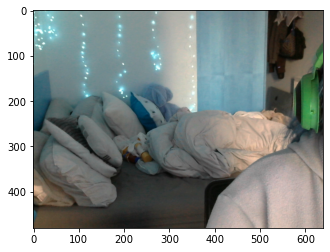

In [ ]:
# widthc = webcamCapture.get(cv2.CAP_PROP_FRAME_WIDTH )
# heightc = webcamCapture.get(cv2.CAP_PROP_FRAME_HEIGHT )
# print(widthc)
# print (heightc)

# #plt.figure(figsize=(18,18))
# #plt.imshow(prob_viz(res, gestureActions, webcamImage, colors))
# plt.imshow(webcamImage)